<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(0__1)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-1'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20-1.csv',
 'data_multi_delta_0_n30-1.csv',
 'data_multi_delta_0_n60-1.csv',
 'data_multi_delta_0_n120-1.csv',
 'data_multi_delta_0_n250-1.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n120-1.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.314689,26.811758,47.145018,0.467056,181.738521,180.978589,0.759932
1,0.0,1.0,84.811384,90.263394,48.152488,0.032898,233.260165,233.468110,-0.207946
2,0.0,2.0,85.367006,79.971966,30.234286,0.211417,205.784676,205.655050,0.129626
3,0.0,3.0,77.359299,99.361088,30.715902,0.051285,217.487574,217.675756,-0.188182
4,0.0,4.0,66.172252,77.690898,81.326401,0.111355,235.300906,235.426081,-0.125175
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.209446,68.505229,38.547898,0.254671,191.517244,191.146497,0.370748
119996,999.0,116.0,59.821851,70.493625,39.142519,-0.715809,178.742186,179.331471,-0.589285
119997,999.0,117.0,27.825940,21.812149,86.626142,1.597295,147.861526,146.320340,1.541187
119998,999.0,118.0,98.429329,29.603075,35.081782,0.792779,173.906965,172.911558,0.995407


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.314689,26.811758,47.145018,0.467056,181.738521,180.978589,0.759932
1,0.0,1.0,84.811384,90.263394,48.152488,0.032898,233.260165,233.468110,-0.207946
2,0.0,2.0,85.367006,79.971966,30.234286,0.211417,205.784676,205.655050,0.129626
3,0.0,3.0,77.359299,99.361088,30.715902,0.051285,217.487574,217.675756,-0.188182
4,0.0,4.0,66.172252,77.690898,81.326401,0.111355,235.300906,235.426081,-0.125175
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.209446,68.505229,38.547898,0.254671,191.517244,191.146497,0.370748
119996,999.0,116.0,59.821851,70.493625,39.142519,-0.715809,178.742186,179.331471,-0.589285
119997,999.0,117.0,27.825940,21.812149,86.626142,1.597295,147.861526,146.320340,1.541187
119998,999.0,118.0,98.429329,29.603075,35.081782,0.792779,173.906965,172.911558,0.995407


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    97.314689  26.811758  47.145018  ...  181.738521  180.978589  0.759932
      1.0    84.811384  90.263394  48.152488  ...  233.260165  233.468110 -0.207946
      2.0    85.367006  79.971966  30.234286  ...  205.784676  205.655050  0.129626
      3.0    77.359299  99.361088  30.715902  ...  217.487574  217.675756 -0.188182
      4.0    66.172252  77.690898  81.326401  ...  235.300906  235.426081 -0.125175
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  74.209446  68.505229  38.547898  ...  191.517244  191.146497  0.370748
      116.0  59.821851  70.493625  39.142519  ...  178.742186  179.331471 -0.589285
      117.0  27.825940  21.812149  86.626142  ...  147.861526  146.320340  1.541187
      118.0  98.429329  29.603075  35.081782  ...  173.906965  172.911558  0.995407
      119.0  48.220330  29.617922  33.572581  ...  121.486095  121.128957  0.357138

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    97.314689  26.811758  47.145018  ...  181.738521  180.978589  0.759932
      1.0    84.811384  90.263394  48.152488  ...  233.260165  233.468110 -0.207946
      2.0    85.367006  79.971966  30.234286  ...  205.784676  205.655050  0.129626
      3.0    77.359299  99.361088  30.715902  ...  217.487574  217.675756 -0.188182
      4.0    66.172252  77.690898  81.326401  ...  235.300906  235.426081 -0.125175
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  74.209446  68.505229  38.547898  ...  191.517244  191.146497  0.370748
      116.0  59.821851  70.493625  39.142519  ...  178.742186  179.331471 -0.589285
      117.0  27.825940  21.812149  86.626142  ...  147.861526  146.320340  1.541187
      118.0  98.429329  29.603075  35.081782  ...  173.906965  172.911558  0.995407
      119.0  48.220330  29.617922  33.572581  ...  121.486095  121.128957  0.357138

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.314689,26.811758,47.145018,0.467056,181.738521,180.978589,0.759932
1,0.0,1.0,84.811384,90.263394,48.152488,0.032898,233.260165,233.468110,-0.207946
2,0.0,2.0,85.367006,79.971966,30.234286,0.211417,205.784676,205.655050,0.129626
3,0.0,3.0,77.359299,99.361088,30.715902,0.051285,217.487574,217.675756,-0.188182
4,0.0,4.0,66.172252,77.690898,81.326401,0.111355,235.300906,235.426081,-0.125175
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,74.209446,68.505229,38.547898,0.254671,191.517244,191.146497,0.370748
119996,999.0,116.0,59.821851,70.493625,39.142519,-0.715809,178.742186,179.331471,-0.589285
119997,999.0,117.0,27.825940,21.812149,86.626142,1.597295,147.861526,146.320340,1.541187
119998,999.0,118.0,98.429329,29.603075,35.081782,0.792779,173.906965,172.911558,0.995407


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    97.314689  26.811758  47.145018  ...  181.738521  180.978589  0.759932
      1.0    84.811384  90.263394  48.152488  ...  233.260165  233.468110 -0.207946
      2.0    85.367006  79.971966  30.234286  ...  205.784676  205.655050  0.129626
      3.0    77.359299  99.361088  30.715902  ...  217.487574  217.675756 -0.188182
      4.0    66.172252  77.690898  81.326401  ...  235.300906  235.426081 -0.125175
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  74.209446  68.505229  38.547898  ...  191.517244  191.146497  0.370748
      116.0  59.821851  70.493625  39.142519  ...  178.742186  179.331471 -0.589285
      117.0  27.825940  21.812149  86.626142  ...  147.861526  146.320340  1.541187
      118.0  98.429329  29.603075  35.081782  ...  173.906965  172.911558  0.995407
      119.0  48.220330  29.617922  33.572581  ...  121.486095  121.128957  0.357138

[120000 rows x 7 columns]

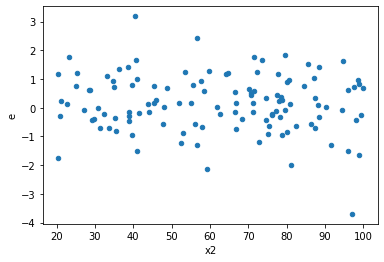

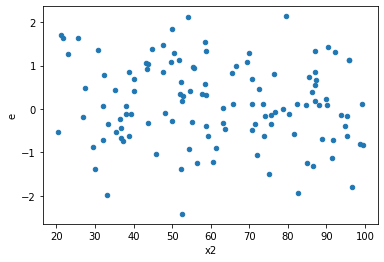

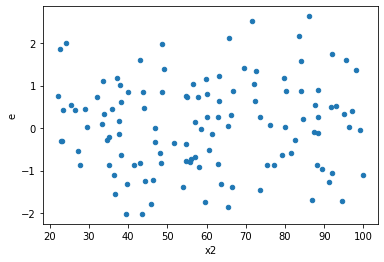

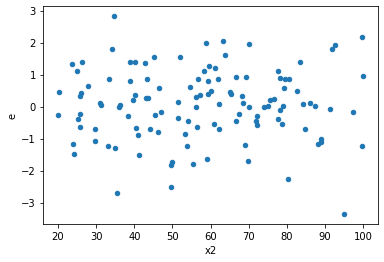

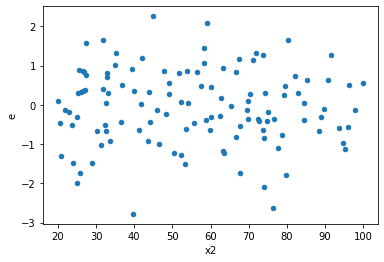

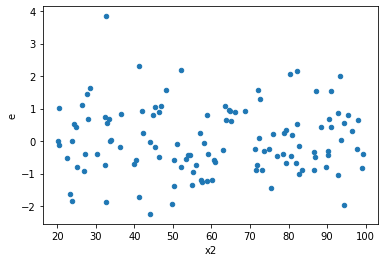

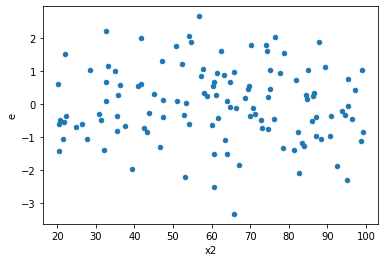

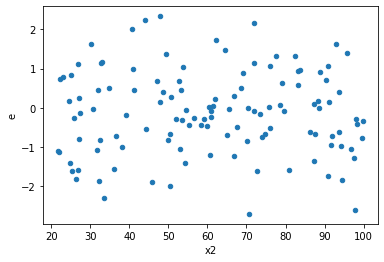

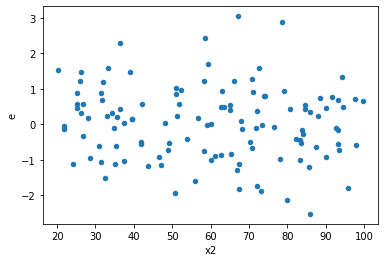

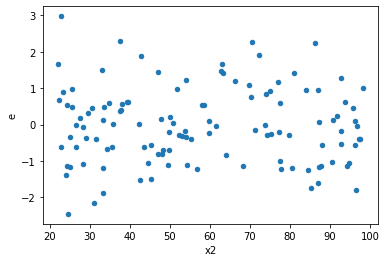

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,45.0,45.0,36.477491714594095,42.07954765060249,0.8106109269909799,0.9351010589022776,1.1535756893549536,0.6338373768622927,0.6830813115688537,0.31691868843114634,Reject005=1 : Homoscedasticity
6.0,45.0,45.0,35.5949715046611,37.16741721324375,0.7909993667702467,0.82594260473875,1.0441760631379278,0.8853561814434556,0.5573219092782722,0.4426780907217278,Reject005=1 : Homoscedasticity
7.0,45.0,45.0,46.76225874930845,49.225610645243286,1.0391613055401878,1.093902458783184,1.0526782059254411,0.8640442783527573,0.5679778608236213,0.43202213917637866,Reject005=1 : Homoscedasticity
8.0,45.0,45.0,34.83896311173607,37.37460820321794,0.7741991802608016,0.8305468489603987,1.0727818759516323,0.8147415126369397,0.5926292436815301,0.40737075631846986,Reject005=1 : Homoscedasticity
10.0,45.0,45.0,39.29589942449253,51.868620221152916,0.8732422094331673,1.1526360049145092,1.3199499433985218,0.3552529417271817,0.8223735291364092,0.17762647086359085,Reject005=1 : Homoscedasticity
12.0,45.0,45.0,47.03908390617029,54.51473778118444,1.0453129756926731,1.211438617359654,1.158924308345927,0.6229016644335843,0.6885491677832078,0.31145083221679215,Reject005=1 : Homoscedasticity
18.0,45.0,45.0,36.04821206997647,48.0580577182861,0.8010713793328105,1.0679568381841356,1.333160646774831,0.33831380180857895,0.8308430990957105,0.16915690090428948,Reject005=1 : Homoscedasticity
20.0,45.0,45.0,40.44709298204552,45.719422163294595,0.8988242884899004,1.0159871591843244,1.1303512512899128,0.6828558629764752,0.6585720685117624,0.3414279314882376,Reject005=1 : Homoscedasticity
21.0,45.0,45.0,36.289016438281486,40.8592261204764,0.8064225875173664,0.9079828026772533,1.1259391995362478,0.6924473119870846,0.6537763440064577,0.3462236559935423,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,31.724851603507226,30.656830185230973,0.7049967023001605,0.6812628930051328,0.9663348648049096,0.9090620794787354,Reject005=1 : Homoscedasticity
1.0,45.0,45.0,47.715470964797376,34.69194775720534,1.0603437992177194,0.7709321723823409,0.7270586888432835,0.28870540329449046,Reject005=1 : Homoscedasticity
2.0,45.0,45.0,44.687079754850075,40.130219460709725,0.9930462167744462,0.8917826546824383,0.8980273421503723,0.7198455039807742,Reject005=1 : Homoscedasticity
3.0,45.0,45.0,45.41102312825141,44.452782875989385,1.0091338472944757,0.9878396194664307,0.9788985099596693,0.9432887036806226,Reject005=1 : Homoscedasticity
4.0,45.0,45.0,36.477491714594095,42.07954765060249,0.8106109269909799,0.9351010589022776,1.1535756893549536,0.6338373768622927,Reject005=1 : Homoscedasticity
5.0,45.0,45.0,44.76472030866739,36.3699211259698,0.994771562414831,0.8082204694659956,0.8124684098367485,0.48887593963174597,Reject005=1 : Homoscedasticity
6.0,45.0,45.0,35.5949715046611,37.16741721324375,0.7909993667702467,0.82594260473875,1.0441760631379278,0.8853561814434556,Reject005=1 : Homoscedasticity
7.0,45.0,45.0,46.76225874930845,49.225610645243286,1.0391613055401878,1.093902458783184,1.0526782059254411,0.8640442783527573,Reject005=1 : Homoscedasticity
8.0,45.0,45.0,34.83896311173607,37.37460820321794,0.7741991802608016,0.8305468489603987,1.0727818759516323,0.8147415126369397,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      949
Reject005=0 : Heteroscedasticity     51
Name: Result_test, dtype: int64